# Importing Neccessory Libraries

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 501kB 9.8MB/s 
     |████████████████████████████████| 4.3MB 39.6MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding

# Data Preprocessing

In [5]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=15000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
X_train = pad_sequences(X_train,maxlen=120)
X_test = pad_sequences(X_test,maxlen=120)

In [7]:
X_train.shape

(25000, 120)

In [0]:
vocab=15000
embed=128

# Building RNN

In [0]:
model=Sequential()
model.add(Embedding(vocab,embed,input_shape=(X_train.shape[1],)))
model.add(LSTM(80,activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 128)          1920000   
_________________________________________________________________
lstm (LSTM)                  (None, 80)                66880     
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 1,986,961
Trainable params: 1,986,961
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train,y_train,epochs=5,batch_size=128,validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
25000/25000 [==============================] - 15s 616us/sample - loss: 0.4446 - accuracy: 0.7844 - val_loss: 0.3454 - val_accuracy: 0.8471
Epoch 2/5
25000/25000 [==============================] - 8s 312us/sample - loss: 0.2417 - accuracy: 0.9065 - val_loss: 0.3649 - val_accuracy: 0.8538
Epoch 3/5
25000/25000 [==============================] - 8s 304us/sample - loss: 0.1713 - accuracy: 0.9380 - val_loss: 0.4278 - val_accuracy: 0.8429
Epoch 4/5
25000/25000 [==============================] - 8s 311us/sample - loss: 0.1139 - accuracy: 0.9609 - val_loss: 0.4272 - val_accuracy: 0.8456
Epoch 5/5
25000/25000 [==============================] - 8s 304us/sample - loss: 0.0794 - accuracy: 0.9734 - val_loss: 0.5932 - val_accuracy: 0.8358


In [0]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

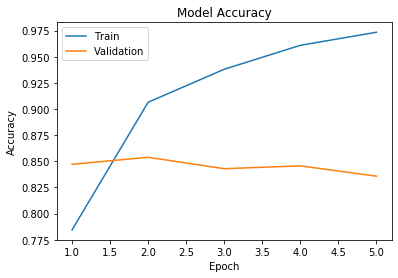

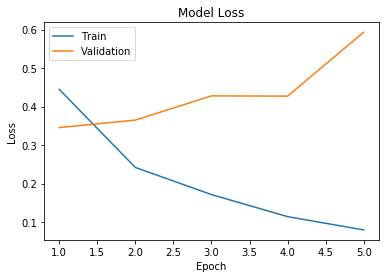

In [14]:
plotLearningCurve(history,5)